## Imports and Data Load

In [1]:
import pandas as pd
import numpy as np

pos_df = pd.read_excel('DatasetPositiveAll.xlsx')
neg_df = pd.read_excel('DatasetNegative.xlsx')

In [2]:
pos_df.dropna(subset=['Abstract'], inplace=True)
pos_df

,PMID,Title,Abstract,T5_Q1,ALPACA_Q1,LAMINI_Q1,Unnamed: 6,ANS_Q1,T5_Q2,ALPACA_Q2,...,AitsLab,Pruas,Combined words 2/4,PubTator_simplified,NER-TP,NER-FP,NER-FN,Prec,Rec,F1
0,11036042,RNA polymerase inhibitors with activity agains...,A collection of rifampin-resistant mutants of ...,<pad> yes</s>,Yes,Yes.,3.0,YES,<pad> no</s>,"Yes, there is a reference to the use of chemic...",...,['corallopyronin a' 'holomycin' 'rifampin' 'ri...,['corallopyronin' 'holomycin' 'rifampin' 'ripo...,['corallopyronin a' 'holomycin' 'rifampin' 'ri...,"['corallopyronin a', 'holomycin', 'rifampin', ...",0,0,0,NaN,NaN,NaN
1,37192172,Streptothricin F is a bactericidal antibiotic ...,The streptothricin natural product mixture (al...,<pad> yes</s>,"No, context: The streptothricin natural produc...",Yes.,2.0,YES,<pad> yes</s>,"Yes, there is a reference to the use of chemic...",...,['carbamoylated gulosamine' 'guanine' 'hydroge...,['carbamoylated' 'carbapenem' 'guanine' 'hydro...,['carbapenem' 'guanine' 'gulosamine' 'hydrogen...,"['carbapenem', 'guanine', 'gulosamine', 'hydro...",12,2,0,0.857143,1.000000,0.923077
2,6258580,Interaction of pseudomonic acid A with Escheri...,Sodium pseudomonate was shown to be a powerful...,<pad> yes</s>,"No, context: Sodium pseudomonate was shown to ...",Yes.,2.0,YES,<pad> yes</s>,"Yes, there is a reference to the use of chemic...",...,['[ 14c ] ile' '[ 14c ] isoleucine' 'amp' 'iso...,['[' 'amp' 'ile' 'isoleucine' 'pyrophosphate' ...,['[14c]isoleucine' 'amp' 'ile' 'isoleucine' 'p...,"['14c]ile', '[14c]isoleucine', 'amp', 'ile', '...",8,1,2,0.888889,0.800000,0.842105
3,16189117,"Efficacy of telavancin (TD-6424), a rapidly ba...","The efficacy of telavancin, a bactericidal lip...",<pad> yes</s>,Yes,Yes.,3.0,YES,<pad> yes</s>,Yes,...,['linezolid' 'methicillin' 'telavancin' 'vanco...,['linezolid' 'methicillin' 'telavancin' 'vanco...,['linezolid' 'methicillin' 'telavancin' 'vanco...,"['linezolid', 'lipoglycopeptide', 'methicillin...",4,0,1,1.000000,0.800000,0.888889
4,13681272,Pharmacology of methicillin.,The pharmacology of a new antibiotic methicill...,<pad> yes</s>,"No, context: The pharmacology of a new antibio...",Yes.,2.0,YES,<pad> yes</s>,"Yes, the pharmacology of the new antibiotic me...",...,['6(2 : 6-dimethoxybenzamido)-penicillanic aci...,['6' 'methicillin' 'penicillin'],['6(2:6-dimethoxybenzamido)-penicillanic acid'...,['6(2:6-dimethoxybenzamido)-penicillanic acid'...,3,0,0,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,30181560,Total synthesis and antimicrobial evaluation o...,Development of effective antimicrobial agents ...,<pad> yes</s>,"No, context: Development of effective antimicr...",Yes.,2.0,YES,<pad> yes</s>,Yes,...,['albomycin' 'albomycin i 2' 'albomycins' 'alb...,['albomycin' 'albomycins'],['albomycin' 'albomycin i 2' 'albomycins' 'alb...,"['albomycins', 'albomycins delta1 (1a), delta2...",3,1,2,0.750000,0.600000,0.666667
186,32424122,"Venturicidin A, A Membrane-active Natural Prod...",Despite the remarkable advances due to the dis...,<pad> yes</s>,Yes,Yes.,3.0,YES,<pad> yes</s>,"Yes, there is a reference to the use of chemic...",...,['aminoglycoside' 'atp' 'gentamicin' 'methicil...,['aminoglycoside' 'atp' 'gentamicin' 'methicil...,['aminoglycoside' 'atp' 'gentamicin' 'methicil...,"['methicillin', 'VentA', 'aminoglycoside', 'ge...",6,0,1,1.000000,0.857143,0.923077
187,20057515,"Walkmycin B targets WalK (YycG), a histidine k...",The WalK (a histidine kinase)/WalR (a response...,<pad> yes</s>,Yes,Yes.,3.0,YES,<pad> yes</s>,Yes,...,['be40665a' 'c(44)h(44)cl(2)o(14)' 'di-anthrac...,['be40665a' 'c' 'di' 'silica' 'walkmycin'],['be40665a' 'c(44)h(44)cl(2)o(14)' 'di-anthrac...,"['silica', 'C(44)H(44)Cl(2)O(14)', 'BE40665A.'...",6,0,0,1.000000,1.000000,1.000000
188,36071214,"Wychimicins, a new class of spirotetronate pol...",In the course of our screening program for new...,<pad> yes</s>,"No, context: In the course of our screening pr...",Yes.,2.0

In [3]:
neg_df.dropna(subset=['ABSTRACT'], inplace=True)
neg_df

,TITLE,ABSTRACT
0,A Bio-inspired Approach To Cyber Security,"Owing to a growing reliance on information, te..."
1,A Comparative Survey on Large Language Models ...,The development of large language models (LLMs...
2,Applications of Machine Learning to the Proble...,Antimicrobial resistance (AMR) remains one of ...
3,Artificial Immune Systems: A Bio-Inspired Para...,Artificial Immune Systems (AIS) are bio-inspir...
4,Artificial intelligence using a latent diffusi...,Artificial intelligence holds great promise fo...
...,...,...
173,Data Mining a Medieval Medical Text Reveals Pa...,We used established methodologies from network...
174,Machine Learning Approaches for Epidemiologica...,Foodborne diseases (FBDs) are infections of th...
175,Discovery of Novel Type II Bacteriocins Using ...,Antimicrobial compounds first arose in prokary...
176,The relationship between substrate morphology ...,Biomedical device-associated infection (BAI) a...


In [4]:
abstracts = pos_df['Abstract'].tolist()
abstracts.extend(neg_df['ABSTRACT'].tolist())

labels = [1]*len(pos_df) + [0]*len(neg_df)

In [5]:
titles = pos_df['Title'].tolist()
titles.extend(neg_df['TITLE'].tolist())

In [6]:
neg_post = neg_df.dropna(subset=['TITLE'])
neg_post

,TITLE,ABSTRACT
0,A Bio-inspired Approach To Cyber Security,"Owing to a growing reliance on information, te..."
1,A Comparative Survey on Large Language Models ...,The development of large language models (LLMs...
2,Applications of Machine Learning to the Proble...,Antimicrobial resistance (AMR) remains one of ...
3,Artificial Immune Systems: A Bio-Inspired Para...,Artificial Immune Systems (AIS) are bio-inspir...
4,Artificial intelligence using a latent diffusi...,Artificial intelligence holds great promise fo...
...,...,...
173,Data Mining a Medieval Medical Text Reveals Pa...,We used established methodologies from network...
174,Machine Learning Approaches for Epidemiologica...,Foodborne diseases (FBDs) are infections of th...
175,Discovery of Novel Type II Bacteriocins Using ...,Antimicrobial compounds first arose in prokary...
176,The relationship between substrate morphology ...,Biomedical device-associated infection (BAI) a...


In [7]:
pos_post = pos_df.dropna(subset=['Title'])
pos_post

,PMID,Title,Abstract,T5_Q1,ALPACA_Q1,LAMINI_Q1,Unnamed: 6,ANS_Q1,T5_Q2,ALPACA_Q2,...,AitsLab,Pruas,Combined words 2/4,PubTator_simplified,NER-TP,NER-FP,NER-FN,Prec,Rec,F1
0,11036042,RNA polymerase inhibitors with activity agains...,A collection of rifampin-resistant mutants of ...,<pad> yes</s>,Yes,Yes.,3.0,YES,<pad> no</s>,"Yes, there is a reference to the use of chemic...",...,['corallopyronin a' 'holomycin' 'rifampin' 'ri...,['corallopyronin' 'holomycin' 'rifampin' 'ripo...,['corallopyronin a' 'holomycin' 'rifampin' 'ri...,"['corallopyronin a', 'holomycin', 'rifampin', ...",0,0,0,NaN,NaN,NaN
1,37192172,Streptothricin F is a bactericidal antibiotic ...,The streptothricin natural product mixture (al...,<pad> yes</s>,"No, context: The streptothricin natural produc...",Yes.,2.0,YES,<pad> yes</s>,"Yes, there is a reference to the use of chemic...",...,['carbamoylated gulosamine' 'guanine' 'hydroge...,['carbamoylated' 'carbapenem' 'guanine' 'hydro...,['carbapenem' 'guanine' 'gulosamine' 'hydrogen...,"['carbapenem', 'guanine', 'gulosamine', 'hydro...",12,2,0,0.857143,1.000000,0.923077
2,6258580,Interaction of pseudomonic acid A with Escheri...,Sodium pseudomonate was shown to be a powerful...,<pad> yes</s>,"No, context: Sodium pseudomonate was shown to ...",Yes.,2.0,YES,<pad> yes</s>,"Yes, there is a reference to the use of chemic...",...,['[ 14c ] ile' '[ 14c ] isoleucine' 'amp' 'iso...,['[' 'amp' 'ile' 'isoleucine' 'pyrophosphate' ...,['[14c]isoleucine' 'amp' 'ile' 'isoleucine' 'p...,"['14c]ile', '[14c]isoleucine', 'amp', 'ile', '...",8,1,2,0.888889,0.800000,0.842105
3,16189117,"Efficacy of telavancin (TD-6424), a rapidly ba...","The efficacy of telavancin, a bactericidal lip...",<pad> yes</s>,Yes,Yes.,3.0,YES,<pad> yes</s>,Yes,...,['linezolid' 'methicillin' 'telavancin' 'vanco...,['linezolid' 'methicillin' 'telavancin' 'vanco...,['linezolid' 'methicillin' 'telavancin' 'vanco...,"['linezolid', 'lipoglycopeptide', 'methicillin...",4,0,1,1.000000,0.800000,0.888889
4,13681272,Pharmacology of methicillin.,The pharmacology of a new antibiotic methicill...,<pad> yes</s>,"No, context: The pharmacology of a new antibio...",Yes.,2.0,YES,<pad> yes</s>,"Yes, the pharmacology of the new antibiotic me...",...,['6(2 : 6-dimethoxybenzamido)-penicillanic aci...,['6' 'methicillin' 'penicillin'],['6(2:6-dimethoxybenzamido)-penicillanic acid'...,['6(2:6-dimethoxybenzamido)-penicillanic acid'...,3,0,0,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,30181560,Total synthesis and antimicrobial evaluation o...,Development of effective antimicrobial agents ...,<pad> yes</s>,"No, context: Development of effective antimicr...",Yes.,2.0,YES,<pad> yes</s>,Yes,...,['albomycin' 'albomycin i 2' 'albomycins' 'alb...,['albomycin' 'albomycins'],['albomycin' 'albomycin i 2' 'albomycins' 'alb...,"['albomycins', 'albomycins delta1 (1a), delta2...",3,1,2,0.750000,0.600000,0.666667
186,32424122,"Venturicidin A, A Membrane-active Natural Prod...",Despite the remarkable advances due to the dis...,<pad> yes</s>,Yes,Yes.,3.0,YES,<pad> yes</s>,"Yes, there is a reference to the use of chemic...",...,['aminoglycoside' 'atp' 'gentamicin' 'methicil...,['aminoglycoside' 'atp' 'gentamicin' 'methicil...,['aminoglycoside' 'atp' 'gentamicin' 'methicil...,"['methicillin', 'VentA', 'aminoglycoside', 'ge...",6,0,1,1.000000,0.857143,0.923077
187,20057515,"Walkmycin B targets WalK (YycG), a histidine k...",The WalK (a histidine kinase)/WalR (a response...,<pad> yes</s>,Yes,Yes.,3.0,YES,<pad> yes</s>,Yes,...,['be40665a' 'c(44)h(44)cl(2)o(14)' 'di-anthrac...,['be40665a' 'c' 'di' 'silica' 'walkmycin'],['be40665a' 'c(44)h(44)cl(2)o(14)' 'di-anthrac...,"['silica', 'C(44)H(44)Cl(2)O(14)', 'BE40665A.'...",6,0,0,1.000000,1.000000,1.000000
188,36071214,"Wychimicins, a new class of spirotetronate pol...",In the course of our screening program for new...,<pad> yes</s>,"No, context: In the course of our screening pr...",Yes.,2.0

## Preprocessing

In [10]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.3 MB/s eta 0:00:00


In [11]:
from unidecode import unidecode
import re

In [12]:
def preprocessing(doc):
    text = doc
    text_l = text.strip().lower()
    text_c = re.sub(r"[^a-z ]", "", text_l)
    text_s = re.sub(r"\s+", " ", text_c)
    return text_s

In [13]:
abstracts = [preprocessing(doc) for doc in abstracts]

## Spacy pipe (tokenization)

In [14]:
import spacy

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
docs = list(nlp.pipe(abstracts))

In [16]:
docs_tokens = [[token for token in doc if not token.is_stop] for doc in docs]

In [17]:
print(docs_tokens[0])

[collection, rifampinresistant, mutants, staphylococcus, aureus, characterized, rna, polymerase, betasubunit, rpob, gene, mutations, crossscreened, number, rna, polymerase, inhibitors, correlate, susceptibility, specific, rpob, genotypes, rpob, mutants, crossresistant, streptolydigin, sorangicin, contrast, thiolutin, holomycin, corallopyronin, ripostatin, retained, activity, rpob, mutants, second, group, inhibitors, interest, drug, development, candidates]


## Vectorization

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [19]:
texts = [doc.text for doc in docs]
vectorizer = TfidfVectorizer(max_df=0.8, min_df=1, max_features=5000).fit(texts)

In [20]:
X = vectorizer.transform([doc.text for doc in docs])
print(X.toarray().shape)

(368, 5000)


In [21]:
lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
X_lsa = lsa.fit_transform(X)
explained_variance = lsa[0].explained_variance_ratio_.sum()
print(explained_variance)

0.4310520745994745


## Visualizations

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_pca = pca.fit_transform(X_lsa)

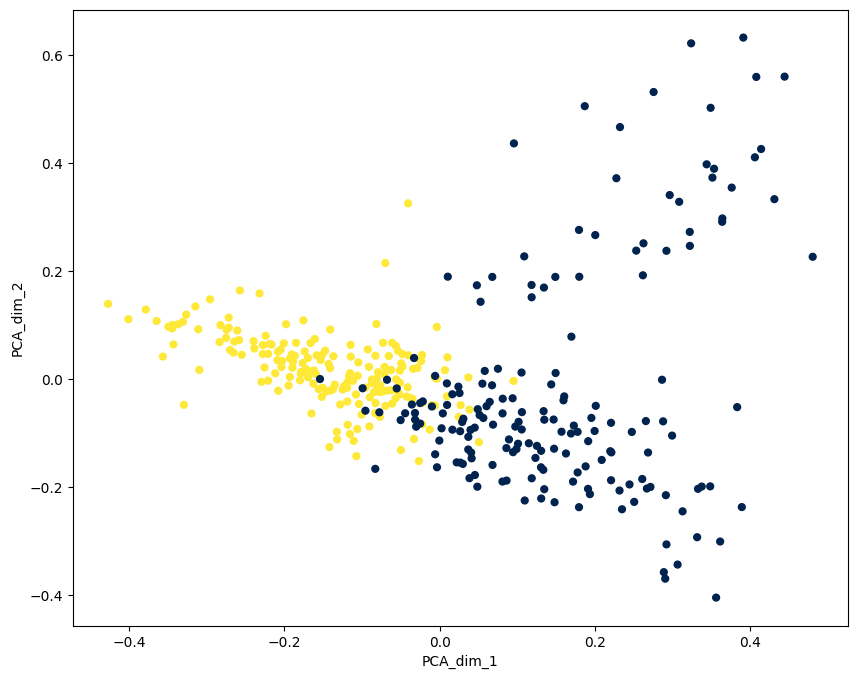

In [52]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_pca[:,0], reduced_pca[:,1], c=labels, cmap='cividis', s=24)

#plt.title("PCA of Abstract Embeddings")
plt.xlabel("PCA_dim_1")
plt.ylabel("PCA_dim_2")
plt.show()

In [46]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([178, 190]))

In [47]:
import plotly.graph_objects as go

text = [title[:100]+'...' if len(title)>100 else title for title in titles]
#for i in range(len(pos_df)):
#    text[i] = text[i] + f'<br>Q1: {post_q1[i]}, Q2: {post_q2[i]}, Q3: {post_q3[i]}'

# Create figure
fig = go.Figure(data=[go.Scatter(
    x=reduced_pca[:,0], y=reduced_pca[:,1],
    mode='markers',
    marker=dict(
        size=9,
        color=labels,           # set color to z values
        colorscale='cividis',   # choose a colorscale
        opacity=1.
    ),
    text=text,
    hoverinfo='text'
)])

# Set layout
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
    ),
    width=800,
    height=700
)

fig.show()

In [48]:
pca_3d = PCA(n_components=3)
reduced_pca_3d = pca_3d.fit_transform(X_lsa)

In [49]:
import plotly.graph_objects as go

text = [title[:100]+'...' if len(title)>100 else title for title in titles]
#for i in range(len(pos_df)):
#    text[i] = text[i] + f'<br>Q1: {post_q1[i]}, Q2: {post_q2[i]}, Q3: {post_q3[i]}'

# Create figure
fig = go.Figure(data=[go.Scatter3d(
    x=reduced_pca_3d[:,0], y=reduced_pca_3d[:,1], z=reduced_pca_3d[:,2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,#postfilter,                # set color to z values
        colorscale='cividis',   # choose a colorscale
        opacity=1.
    ),
    text=text,
    hoverinfo='text'
)])

# Set layout
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    width=800,
    height=700
)

fig.show()